In [40]:
df1 = pd.DataFrame([[np.nan, 3., 5.], [-4.6, np.nan, np.nan], [np.nan, 7., np.nan]])

In [46]:
df1

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN


In [43]:
df2 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [np.nan, 7., np.nan], [np.nan, 7., np.nan]])

In [47]:
df2

,0,1,2
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,NaN,7.0,NaN
3,NaN,7.0,NaN


In [49]:
pd.merge(df1, df2, how='outer', )

,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,NaN
2,NaN,7.0,NaN
3,NaN,7.0,NaN
4,1.0,2.0,3.0
5,4.0,5.0,6.0


In [7]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from matplotlib.path import Path
%matplotlib inline

import numpy as np

from learning_utilities import *

Setting environment for Gordon
Setting environment for Gordon


In [2]:
from sklearn.externals import joblib

In [3]:
# def convert_to_surround_name(name_u, suffix):
#     return name_u + '_surround_' + suffix

In [4]:
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
                    'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
structures = paired_structures + singular_structures

In [9]:
# structures = ['7N', '12N']
# labels_to_sample = structures + map(convert_to_surround_name, structures)
labels_to_sample = structures + [convert_to_surround_name(l, surr_l) for l in structures for surr_l in structures + ['noclass'] if surr_l not in l]

Setting environment for Gordon
Setting environment for Gordon
Setting environment for Gordon


In [11]:
# Extract training features - random subset

training_addresses = defaultdict(list)

labels = set([])

# for stack in ['MD589', 'MD585', 'MD594']:
for stack in ['MD635']: # Neurotrace stack
    annotation_grid_indices_fn = '/home/yuncong/csd395/CSHL_labelings_v3/%(stack)s/%(stack)s_annotation_grid_indices.h5' % dict(stack=stack)
    label_gridIndices = read_hdf(annotation_grid_indices_fn, 'grid_indices')
    
    labels_this_stack = set(label_gridIndices.index) & set(labels_to_sample)
    labels = labels | labels_this_stack
    
    training_addresses_sec_idx = sample_locations(label_gridIndices, labels_this_stack, num_samples_per_landmark=1000)
    
    for name_u, addresses in training_addresses_sec_idx.iteritems():
        training_addresses[name_u] += [(stack, ) + addr for addr in addresses]
        
training_addresses.default_factory = None
        
# sampled_addresses = {name_u: np.array(addresses) for name_u, addresses in sampled_addresses.iteritems()}

In [65]:
# See if we can use location on image frame as feature

# def addresses_to_locations(addresses):
    
#     key_func = lambda (i, (st, se, idx)): st
    
#     locations = []
    
#     for stack, group in groupby(sorted(enumerate(addresses), key=key_func), key=key_func):
#         sample_locations = grid_parameters_to_sample_locations(get_default_gridspec(stack))
#         for i, (st, se, idx) in group:
#             locations.append((i, sample_locations[idx]))
    
#     return [loc for i, loc in sorted(locations)]

In [66]:
# locations = np.array(addresses_to_locations(training_addresses['10N']))

# plt.scatter(locations[:,0], locations[:,1]);
# plt.xlim([0, 15000]);
# plt.ylim([0, 12000]);

In [14]:
training_features = apply_function_to_dict(addresses_to_features, training_addresses)

('MD635', 230)
('MD635', 231)
('MD635', 233)
('MD635', 234)
('MD635', 235)
('MD635', 236)
('MD635', 237)
('MD635', 238)
('MD635', 239)
('MD635', 240)
('MD635', 241)


Patch in annotation but not in mask: MD635 241 MD635-F94-2016.05.19-18.31.07_MD635_2_0281 alignedTo MD635-F63-2016.05.19-08.39.03_MD635_2_0188 @17514


('MD635', 242)
('MD635', 243)
('MD635', 244)
('MD635', 245)
('MD635', 246)
('MD635', 247)
('MD635', 248)
('MD635', 249)
('MD635', 250)
('MD635', 251)
('MD635', 252)
('MD635', 253)
('MD635', 254)
('MD635', 255)
('MD635', 256)
('MD635', 257)
('MD635', 258)
('MD635', 259)
('MD635', 260)


In [15]:
training_features = {name: np.array([f for f in feats if f is not None]) 
                     for name, feats in training_features.iteritems()}

In [16]:
for name in sorted(training_features.iterkeys()):
    print name, len(training_features[name])

10N 526
10N_surround_12N 1000
10N_surround_noclass 1000
12N 1000
12N_surround_10N 340
12N_surround_noclass 1000
6N 307
6N_surround_7n 66
6N_surround_noclass 1000
7n 1000
7n_surround_6N 58
7n_surround_noclass 1000
IC 1000
IC_surround_SC 1000
IC_surround_noclass 1000
LC 570
LC_surround_noclass 1000
Pn 999
Pn_surround_RtTg 1000
Pn_surround_noclass 1000
RtTg 1000
RtTg_surround_Pn 1000
RtTg_surround_Tz 515
RtTg_surround_noclass 1000
SC 1000
SC_surround_IC 1000
SC_surround_noclass 1000
Tz 1000
Tz_surround_RtTg 804
Tz_surround_noclass 1000


In [18]:
# Use a new folder for NT blue classifiers
SVM_ROOTDIR = '/home/yuncong/csd395/CSHL_patch_features_Sat16ClassFinetuned_v2_classifiers_neurotraceBlue/'

In [20]:
# Save training features

train_feat_dir = create_if_not_exists(os.path.join(SVM_ROOTDIR, 'training_features/'))

for name_u, feats in training_features.iteritems():
    bp.pack_ndarray_file(feats, os.path.join(train_feat_dir, name_u + '_trainSampleScheme_1.bp'))

In [21]:
# Load training features

training_features = {name_u: bp.unpack_ndarray_file(os.path.join(SVM_ROOTDIR, 'training_features', \
                                 name_u + '_trainSampleScheme_1.bp'))
                     for name_u in labels}

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
from xgboost.sklearn import XGBClassifier

In [23]:
# negatives are surrounding patches that are not of other positive classes
# LogisticRegression(penalty='l2')
train_sample_scheme = 1

# negatives are surrounding patches that include other positive classes
# LogisticRegression(penalty='l1')
# train_sample_scheme = 2

# negatives are surrounding patches that are not of other positive classes
# SVC(kernel='linear')
# train_sample_scheme = 3

# negatives are surrounding patches that are not of other positive classes
# LinearSVC(kernel='linear') + CalibratedClassifierCV
# train_sample_scheme = 4

# negatives are surrounding patches that are not of other positive classes
# XGBClassifier
# train_sample_scheme = 5

# negatives are surrounding patches that are not of other positive classes
# sklearn.ensemble.GradientBoostingClassifier, max_depth=3, n_estimators=200
# train_sample_scheme = 6

# negatives are surrounding patches that are not of other positive classes
# sklearn.ensemble.GradientBoostingClassifier, max_depth=5, n_estimators=100
# train_sample_scheme = 7

In [25]:
# train svm classifiers

svm_dir = create_if_not_exists(os.path.join(SVM_ROOTDIR, 'classifiers'))
# svm_dir = create_if_not_exists(os.path.join(SVM_ROOTDIR + '/trainSampleScheme_%(scheme)d' % {'scheme':train_sample_scheme}))

for label in structures:
            
    print label

    t = time.time()

    features_pos = training_features[label]
    
    if train_sample_scheme in [1, 3, 4, 5, 6, 7]:
        features_neg = training_features[convert_to_surround_name(label, 'noclass')]
    elif train_sample_scheme == 2:
        features_neg = np.vstack([training_features[convert_to_surround_name(label, 'noclass')]] + \
                                  [training_features[convert_to_surround_name(label, surr_l)] 
                                  for surr_l in structures if convert_to_surround_name(label, surr_l) in labels])
    else:
        sys.stderr.write('training scheme is not recognized.\n')
   
    train_data0 = np.r_[features_pos, features_neg]
    train_labels0 = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]
    
#     n_train = len(train_labels0)
#     ri = np.random.choice(range(n_train), size=100, replace=False)
#     train_data = train_data0[ri]
#     train_labels = train_labels0[ri]

    train_data = train_data0
    train_labels = train_labels0
    
#     svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
#           probability=True, tol=0.001, cache_size=1000, class_weight=None, verbose=False, 
#           max_iter=-1, decision_function_shape=None, random_state=None)

    if train_sample_scheme == 1:
        # L2 penalty - train: 0.88, test acc: 0.84
        clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

    elif train_sample_scheme == 2:
        # L1 penalty - test acc: 0.818
        clf = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

            
    elif train_sample_scheme == 3:
        # Slow - train acc: 0.69, test acc: 0.68
        clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=1000, max_iter=-1,
              decision_function_shape=None, random_state=None)
        
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})


    elif train_sample_scheme == 4:
        # train 0.75, test 0.74
        
        sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                                C=1.0, multi_class='ovr', 
                                fit_intercept=True, intercept_scaling=1, max_iter=100)
        clf = CalibratedClassifierCV(sv_uncalibrated)
        
#         clf.fit(train_data, train_labels)
#         joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

        
    elif train_sample_scheme == 5:
        # train 
        
        # http://xgboost.readthedocs.io/en/latest/python/python_api.html
        clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                            silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                            min_child_weight=20, max_delta_step=0, subsample=.8, 
                            colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                            scale_pos_weight=1, base_score=0.5, seed=0, missing=None)
        
#         clf.fit(train_data, train_labels)
#         joblib.dump(svc, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

    elif train_sample_scheme == 6:
        # acc: 0.96/0.85
        
        # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=3, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')
        
    elif train_sample_scheme == 7:
        # acc: 0.98/0.87
        
        # http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=5, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')
        
    
    else:
        sys.stderr.write('training scheme is not recognized.\n')
 
    sys.stderr.write('train classifier: %.2f seconds\n' % (time.time() - t))
    
    clf.fit(train_data, train_labels)
    joblib.dump(clf, svm_dir + '/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})
        
#     del features_pos, features_neg, train_data, train_labels, svc

5N


KeyError: '5N'

# Load pre-computed svm classifiers

In [146]:
svc_allClasses = {}
for label in structures:
    svc_allClasses[label] = joblib.load(SVM_ROOTDIR + '/classifiers/%(label)s_svm_trainSampleScheme_%(scheme)d.pkl' % {'label': label, 'scheme':train_sample_scheme})

In [34]:
# visualize training patches

In [ ]:
patches = extract_patches_given_locations_multiple_sections(sampled_addresses['AP'], 'grid_index')

In [ ]:
display_images_in_grids(patches, 5)

In [ ]:
patches = extract_patches_given_locations_multiple_sections(sampled_addresses['AP_surround'], 'grid_index')

In [ ]:
display_images_in_grids(patches, 5, titles=sampled_addresses['AP_surround'])

In [ ]:
# Visualize a patch in context

patch_size, stride, _, _ = get_default_gridspec('MD589')
grid_locations = grid_parameters_to_sample_locations(get_default_gridspec('MD589'))
viz = patch_boxes_overlay_on('original', 8, 
                       [grid_locations[44453]],
                      patch_size=patch_size,
                      stack='MD589',
                       sec=219)
display_image(viz)

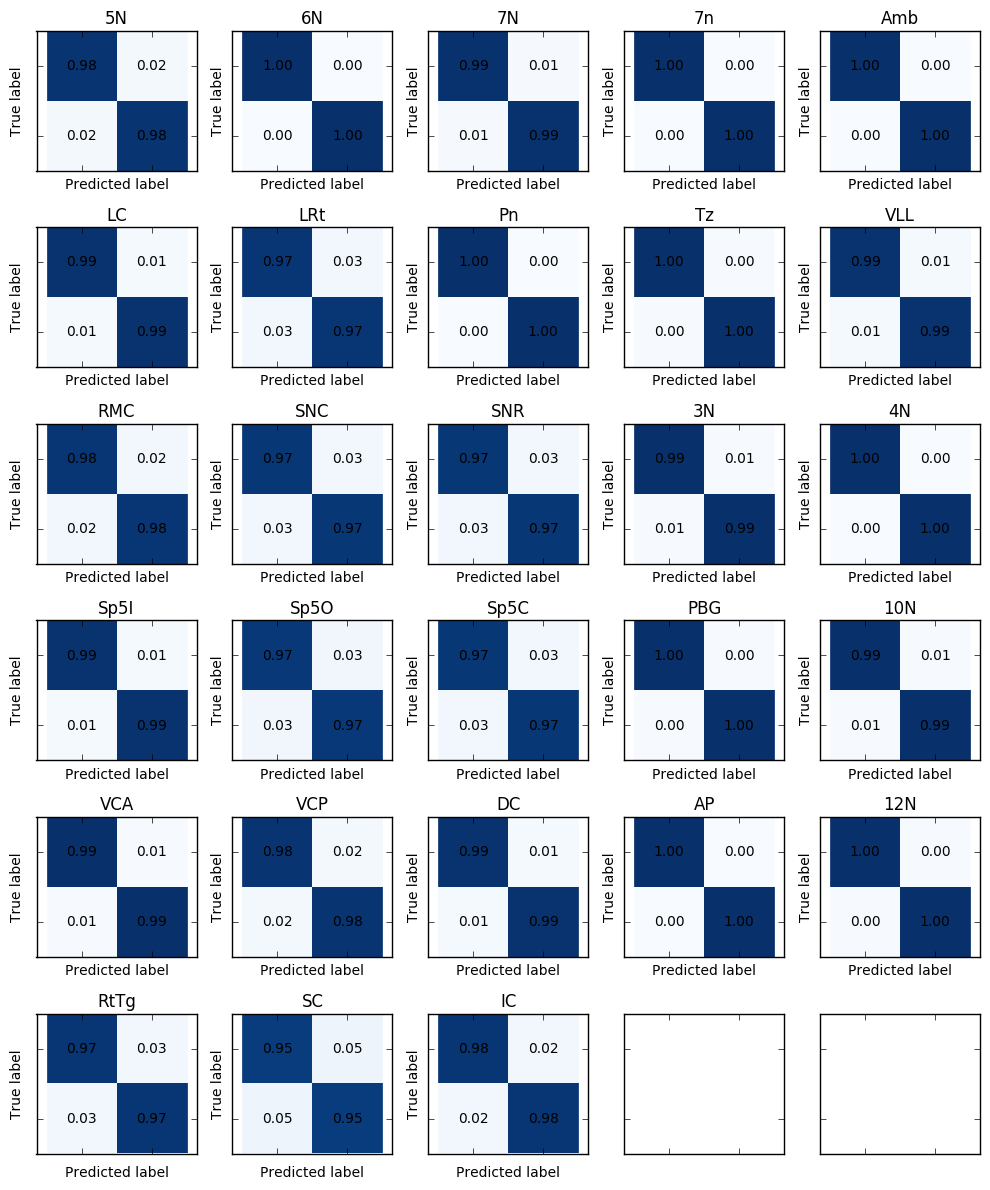

In [148]:
# Compute training accuracy

acc_all_structures = {}

nrows = len(structures)/5 + 1
ncols = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2), sharex=True, sharey=True)
axes = axes.flatten()

for i, label in enumerate(structures):
    
    features_pos = training_features[label]
    
    if train_sample_scheme in [1,3,4,5,6,7]:
        features_neg = training_features[convert_to_surround_name(label, 'noclass')]
    elif train_sample_scheme == 2:
        features_neg = np.vstack([training_features[convert_to_surround_name(label, 'noclass')]] + \
                                  [training_features[convert_to_surround_name(label, surr_l)] 
                                  for surr_l in structures if convert_to_surround_name(label, surr_l) in labels])
    else:
        sys.stderr.write('training scheme is not recognized.\n')

    
    train_data = np.r_[features_pos, features_neg]
    train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]
    
    svc = svc_allClasses[label]
    
    probs = svc.predict_proba(train_data)[:, svc.classes_.tolist().index(1.)]
    cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in train_labels], soft=True)
    
    acc_all_structures[label] = .5 * (cm[0,0] + cm[1,1])
    
    plot_confusion_matrix(cm, title='%(label)s'% {'label':label},
                          labels=['',''],
#                           labels=[label, convert_to_surround_name(label)],
                         axis=axes[i])
#     plt.show();

plt.tight_layout()

In [149]:
print 'training accuracy:', np.mean(acc_all_structures.values())

training accuracy: 0.985115947072


# Test

In [24]:
# Extract test samples

test_addresses = defaultdict(list)

for stack in ['MD589', 'MD585', 'MD594']:
    annotation_grid_indices_fn = '/home/yuncong/csd395/CSHL_labelings_v3/%(stack)s/%(stack)s_annotation_grid_indices.h5' % dict(stack=stack)
    label_gridIndices = read_hdf(annotation_grid_indices_fn, 'grid_indices')
    sampled_addresses_sec_idx = sample_locations(label_gridIndices, labels, num_samples_per_landmark=1000)
    
    for name_u, addresses in sampled_addresses_sec_idx.iteritems():
        test_addresses[name_u] += [(stack, ) + addr for addr in addresses]
        
test_addresses.default_factory = None
        
# sampled_addresses = {name_u: np.array(addresses) for name_u, addresses in sampled_addresses.iteritems()}

Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.
Cell is empty.


In [25]:
test_features = apply_function_to_dict(addresses_to_features, test_addresses)

('MD585', 83)
('MD585', 84)
('MD585', 85)
('MD585', 86)
('MD585', 87)
('MD585', 88)
('MD585', 89)
('MD585', 90)
('MD585', 91)
('MD585', 92)
('MD585', 93)
('MD585', 94)
('MD585', 95)
('MD585', 96)
('MD585', 97)
('MD585', 98)
('MD585', 99)
('MD585', 100)
('MD585', 101)
('MD585', 102)
('MD585', 103)
('MD585', 104)
('MD585', 105)
('MD585', 106)
('MD585', 107)
('MD585', 108)
('MD585', 109)
('MD585', 110)
('MD585', 111)
('MD585', 112)
('MD585', 113)
('MD585', 114)
('MD585', 115)
('MD585', 116)
('MD585', 117)
('MD585', 119)
('MD585', 120)
('MD585', 121)
('MD585', 122)
('MD585', 123)
('MD585', 124)
('MD585', 125)
('MD585', 126)
('MD585', 127)
('MD585', 128)
('MD585', 129)
('MD585', 130)
('MD585', 131)
('MD585', 132)
('MD585', 133)
('MD585', 134)
('MD585', 135)
('MD585', 136)
('MD585', 137)
('MD585', 138)
('MD585', 139)


Patch in annotation but not in mask: MD585 139 MD585-N26-2015.08.19-15.37.53_MD585_1_0076 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @53778


('MD585', 140)
('MD585', 141)
('MD585', 142)
('MD585', 143)
('MD585', 144)
('MD585', 145)
('MD585', 146)
('MD585', 147)
('MD585', 148)
('MD585', 149)
('MD585', 150)
('MD585', 151)


Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @55256
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @50597
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @52706
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @50594
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @54826
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @50624
Patch in annotation but not in mask: MD585 151 MD585-N28-2015.08.19-15.47.09_MD585_1_0082 alignedTo 

('MD585', 152)
('MD585', 153)
('MD585', 154)
('MD585', 155)
('MD585', 156)
('MD585', 157)
('MD585', 158)
('MD585', 159)
('MD585', 160)
('MD585', 161)
('MD585', 162)
('MD585', 163)
('MD585', 164)
('MD585', 165)
('MD585', 166)
('MD585', 167)
('MD585', 168)
('MD585', 169)
('MD585', 170)
('MD585', 171)
('MD585', 172)
('MD585', 173)
('MD585', 174)
('MD585', 175)
('MD585', 176)
('MD585', 177)
('MD585', 178)
('MD585', 179)
('MD585', 180)
('MD585', 181)
('MD585', 182)
('MD585', 183)
('MD585', 184)
('MD585', 185)
('MD585', 186)
('MD585', 187)
('MD585', 188)
('MD585', 189)
('MD585', 190)
('MD585', 191)
('MD585', 192)
('MD585', 193)
('MD585', 194)
('MD585', 195)
('MD585', 196)
('MD585', 197)
('MD585', 198)
('MD585', 199)
('MD585', 200)
('MD585', 201)
('MD585', 202)
('MD585', 203)
('MD585', 204)
('MD585', 205)
('MD585', 206)
('MD585', 207)
('MD585', 208)
('MD585', 209)
('MD585', 210)
('MD585', 211)
('MD585', 212)
('MD585', 213)
('MD585', 214)
('MD585', 215)
('MD585', 216)
('MD585', 217)
('MD585', 

Patch in annotation but not in mask: MD585 225 MD585-N40-2015.07.16-22.14.28_MD585_2_0119 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @25552


('MD585', 226)
('MD585', 227)
('MD585', 228)
('MD585', 229)
('MD585', 230)
('MD585', 231)
('MD585', 232)
('MD585', 233)
('MD585', 234)
('MD585', 235)
('MD585', 236)
('MD585', 237)
('MD585', 238)
('MD585', 239)
('MD585', 240)
('MD585', 241)
('MD585', 242)
('MD585', 243)
('MD585', 244)
('MD585', 245)
('MD585', 246)
('MD585', 247)
('MD585', 248)
('MD585', 249)
('MD585', 250)
('MD585', 251)
('MD585', 252)
('MD585', 253)
('MD585', 254)
('MD585', 255)
('MD585', 256)
('MD585', 257)
('MD585', 258)
('MD585', 259)
('MD585', 260)
('MD585', 261)
('MD585', 262)
('MD585', 263)
('MD585', 264)
('MD585', 265)
('MD585', 266)
('MD585', 267)
('MD585', 269)
('MD585', 270)
('MD585', 271)
('MD585', 272)
('MD585', 273)
('MD585', 274)
('MD585', 275)
('MD585', 276)
('MD585', 277)
('MD585', 278)
('MD585', 279)
('MD585', 280)
('MD585', 281)
('MD585', 282)
('MD585', 283)
('MD585', 284)
('MD585', 285)
('MD585', 286)
('MD585', 287)
('MD585', 288)
('MD585', 289)
('MD585', 290)
('MD585', 291)
('MD585', 292)
('MD585', 

Patch in annotation but not in mask: MD585 332 MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @36192
Patch in annotation but not in mask: MD585 332 MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @35981
Patch in annotation but not in mask: MD585 332 MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @34711
Patch in annotation but not in mask: MD585 332 MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172 alignedTo MD585-N47-2015.07.16-22.50.52_MD585_3_0141 @35345


('MD585', 333)
('MD585', 334)
('MD585', 335)
('MD585', 336)
('MD585', 337)
('MD585', 338)
('MD585', 339)
('MD585', 340)
('MD585', 341)
('MD585', 342)
('MD585', 343)
('MD585', 344)
('MD585', 345)
('MD585', 346)
('MD585', 347)
('MD585', 348)
('MD585', 349)
('MD585', 350)
('MD589', 94)
('MD589', 95)
('MD589', 96)
('MD589', 97)
('MD589', 98)
('MD589', 99)
('MD589', 100)
('MD589', 101)
('MD589', 102)
('MD589', 103)
('MD589', 104)
('MD589', 105)
('MD589', 106)
('MD589', 107)
('MD589', 108)
('MD589', 109)
('MD589', 110)
('MD589', 111)
('MD589', 112)
('MD589', 113)
('MD589', 114)
('MD589', 115)
('MD589', 116)
('MD589', 117)
('MD589', 119)
('MD589', 120)
('MD589', 121)
('MD589', 122)
('MD589', 123)
('MD589', 124)
('MD589', 125)
('MD589', 126)
('MD589', 127)
('MD589', 128)
('MD589', 129)
('MD589', 130)
('MD589', 131)
('MD589', 132)
('MD589', 133)
('MD589', 134)
('MD589', 135)
('MD589', 136)
('MD589', 137)
('MD589', 138)
('MD589', 139)
('MD589', 140)
('MD589', 141)
('MD589', 142)
('MD589', 143)
(

Patch in annotation but not in mask: MD594 139 MD594-N27-2015.08.26-22.22.46_MD594_1_0079 alignedTo MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172 @47322


('MD594', 140)
('MD594', 141)
('MD594', 142)
('MD594', 143)
('MD594', 144)
('MD594', 145)
('MD594', 146)
('MD594', 147)
('MD594', 148)
('MD594', 149)
('MD594', 150)
('MD594', 151)
('MD594', 152)
('MD594', 153)
('MD594', 154)
('MD594', 155)
('MD594', 156)
('MD594', 157)
('MD594', 158)
('MD594', 159)
('MD594', 160)
('MD594', 161)
('MD594', 162)
('MD594', 163)
('MD594', 164)
('MD594', 165)
('MD594', 166)
('MD594', 167)
('MD594', 168)
('MD594', 169)
('MD594', 170)
('MD594', 171)
('MD594', 172)
('MD594', 173)
('MD594', 174)
('MD594', 175)
('MD594', 176)
('MD594', 177)
('MD594', 178)
('MD594', 179)
('MD594', 180)
('MD594', 181)
('MD594', 182)
('MD594', 183)
('MD594', 184)
('MD594', 185)
('MD594', 186)
('MD594', 188)
('MD594', 189)
('MD594', 190)
('MD594', 191)
('MD594', 192)
('MD594', 194)
('MD594', 195)
('MD594', 196)
('MD594', 197)
('MD594', 198)
('MD594', 199)
('MD594', 200)
('MD594', 201)
('MD594', 202)
('MD594', 203)
('MD594', 204)
('MD594', 205)
('MD594', 206)
('MD594', 207)
('MD594', 

Patch in annotation but not in mask: MD594 273 MD594-N61-2015.08.27-00.31.50_MD594_1_0181 alignedTo MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172 @44235
Patch in annotation but not in mask: MD594 273 MD594-N61-2015.08.27-00.31.50_MD594_1_0181 alignedTo MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172 @44038
Patch in annotation but not in mask: MD594 273 MD594-N61-2015.08.27-00.31.50_MD594_1_0181 alignedTo MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172 @45604
Patch in annotation but not in mask: MD594 273 MD594-N61-2015.08.27-00.31.50_MD594_1_0181 alignedTo MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172 @45797
Patch in annotation but not in mask: MD594 273 MD594-N61-2015.08.27-00.31.50_MD594_1_0181 alignedTo MD594-IHC58-2015.08.26-18.48.50_MD594_1_0172 @44626


('MD594', 274)
('MD594', 275)
('MD594', 276)
('MD594', 277)
('MD594', 278)
('MD594', 279)
('MD594', 280)
('MD594', 281)
('MD594', 282)
('MD594', 283)
('MD594', 284)
('MD594', 285)
('MD594', 286)
('MD594', 287)
('MD594', 288)
('MD594', 289)
('MD594', 290)
('MD594', 291)
('MD594', 292)
('MD594', 293)
('MD594', 294)
('MD594', 295)
('MD594', 296)
('MD594', 297)
('MD594', 298)
('MD594', 299)
('MD594', 300)
('MD594', 301)
('MD594', 302)
('MD594', 303)
('MD594', 304)
('MD594', 305)
('MD594', 306)
('MD594', 307)
('MD594', 308)
('MD594', 309)
('MD594', 310)
('MD594', 311)
('MD594', 312)
('MD594', 313)
('MD594', 314)
('MD594', 315)
('MD594', 316)
('MD594', 317)
('MD594', 318)
('MD594', 319)
('MD594', 320)
('MD594', 321)
('MD594', 322)
('MD594', 323)
('MD594', 324)
('MD594', 325)
('MD594', 326)
('MD594', 327)
('MD594', 328)
('MD594', 329)
('MD594', 330)
('MD594', 331)
('MD594', 332)
('MD594', 333)
('MD594', 334)
('MD594', 335)
('MD594', 336)
('MD594', 337)
('MD594', 338)
('MD594', 339)
('MD594', 

In [26]:
test_features = {name: np.array([f for f in feats if f is not None]) for name, feats in test_features.iteritems()}

In [38]:
# Save test features

test_feat_dir = create_if_not_exists(os.path.join(SVM_ROOTDIR, 'test_features'))

for name_u, feats in test_features.iteritems():
    bp.pack_ndarray_file(feats, os.path.join(test_feat_dir, name_u + '.bp'))

In [ ]:
# Load test features

test_feat_dir = create_if_not_exists(os.path.join(SVM_ROOTDIR, 'test_features'))

test_features = {name_u: bp.unpack_ndarray_file(os.path.join(test_feat_dir, name_u + '.bp'))
                     for name_u in labels_to_sample}

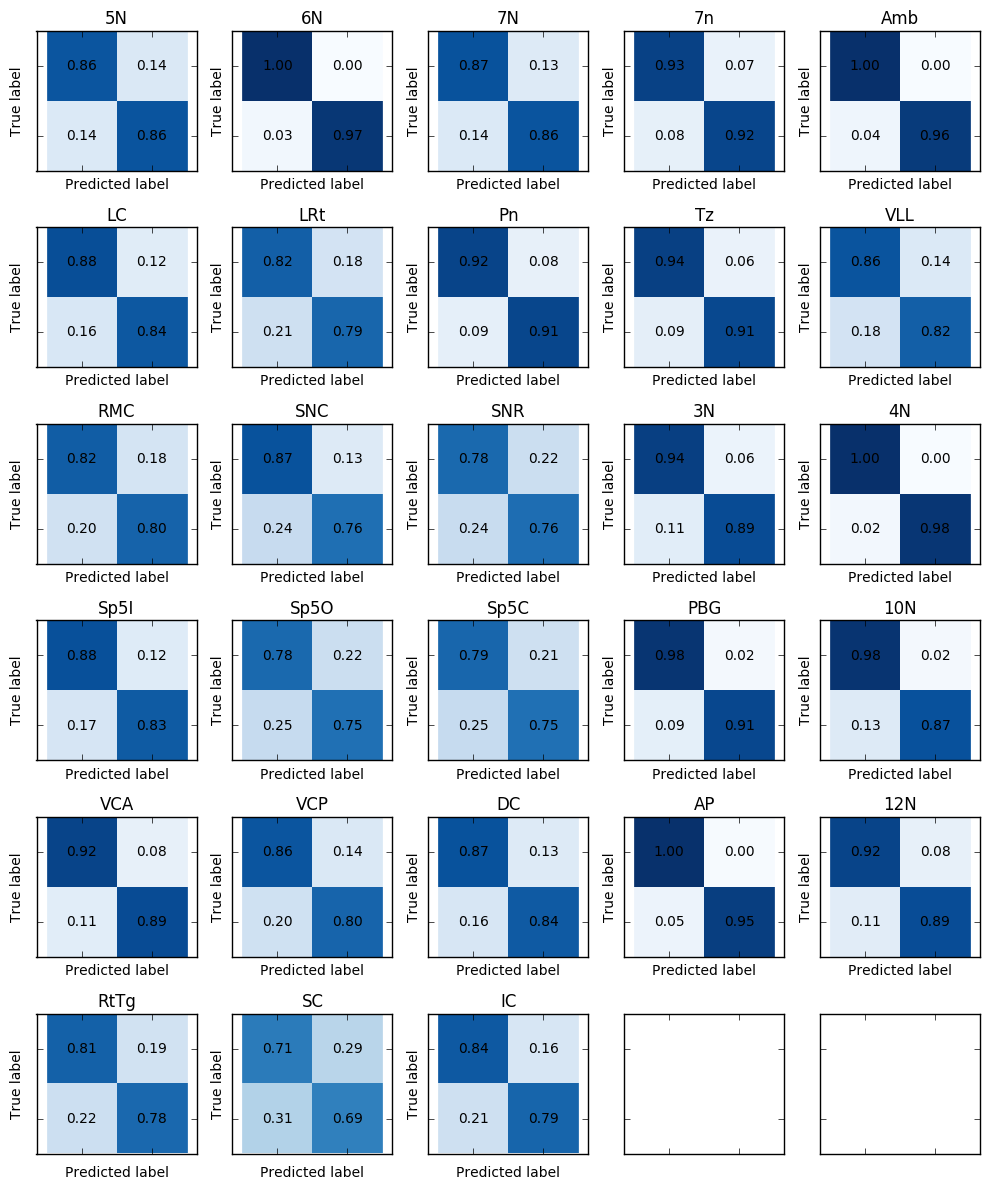

In [150]:
# Compute test accuracy

acc_all_structures = {}

nrows = len(structures)/5 + 1
ncols = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2), sharex=True, sharey=True)
axes = axes.flatten()

for i, label in enumerate(structures):
    
    features_pos = test_features[label]
    
#     features_neg = test_features[convert_to_surround_name(label)]
    
    if train_sample_scheme in [1,3,4,5,6,7]:
        features_neg = test_features[convert_to_surround_name(label, 'noclass')]
    elif train_sample_scheme == 2:
        features_neg = np.vstack([test_features[convert_to_surround_name(label, 'noclass')]] + \
                                  [test_features[convert_to_surround_name(label, surr_l)] 
                                  for surr_l in structures if convert_to_surround_name(label, surr_l) in labels])
    else:
        sys.stderr.write('training scheme is not recognized.\n')
        
    
    test_data = np.r_[features_pos, features_neg]
    test_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]
    
    svc = svc_allClasses[label]
    
    probs = svc.predict_proba(test_data)[:, svc.classes_.tolist().index(1.)]
    cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in test_labels], soft=True)
    
    acc_all_structures[label] = .5 * (cm[0,0] + cm[1,1])
    
    plot_confusion_matrix(cm, title='%(label)s'% {'label':label},
                          labels=['',''],
#                           labels=[label, convert_to_surround_name(label)],
                         axis=axes[i])
#     plt.show();

plt.tight_layout()

In [151]:
print 'test accuracy:', np.mean(acc_all_structures.values())

test accuracy: 0.868003951425


In [ ]:
# Predict full frame

In [ ]:
stack = 'MD591'

filenames_to_sections, sections_to_filenames = DataManager.load_sorted_filenames(stack)
first_sec, last_sec = DataManager.load_cropbox(stack)[4:]
anchor_fn = DataManager.load_anchor_filename(stack)

In [ ]:
def svm_predict(stack, sec):
    fn = sections_to_filenames[sec]
    if fn in ['Nonexisting', 'Rescan', 'Placeholder']:
        return

    feature_fn = PATCH_FEATURES_ROOTDIR + '/%(stack)s/%(fn)s_lossless_alignedTo_%(anchor_fn)s_cropped/%(fn)s_lossless_alignedTo_%(anchor_fn)s_cropped_features.hdf' % dict(stack=stack, fn=fn, anchor_fn=anchor_fn)
    
    try:
        features = load_hdf(feature_fn)
    except Exception as e:
        sys.stderr.write(e.message + '\n')
        return
    
    output_dir = create_if_not_exists(os.path.join(SPARSE_SCORES_ROOTDIR, stack, '%(fn)s_lossless_alignedTo_%(anchor_fn)s_cropped' % \
                                      {'fn': fn, 'anchor_fn': anchor_fn}))
    
    for label in structures:
        svc = svc_allClasses[label]
        probs = svc.predict_proba(features)[:, svc.classes_.tolist().index(1.)]
        output_fn = output_dir + '/%(fn)s_lossless_alignedTo_%(anchor_fn)s_cropped_%(label)s_sparseScores.hdf' % \
                    {'fn': fn, 'anchor_fn': anchor_fn, 'label':label}
        bp.pack_ndarray_file(probs, output_fn)

In [ ]:
t = time.time()
# Parallel(n_jobs=8)(delayed(svm_predict)(stack=stack, sec=sec) for sec in range(first_sec, last_sec+1))
Parallel(n_jobs=8)(delayed(svm_predict)(stack=stack, sec=sec) for sec in range(200, 201))
sys.stderr.write('svm predict: %.2f seconds\n' % (time.time() - t)) # 35 s / 10 section; 863 seconds /stack